In [1]:
%load_ext autoreload
%autoreload 2

from src.datasets.euclidean import SineDataset
n_points = 20
dataset = SineDataset(n_points)
points = dataset.points

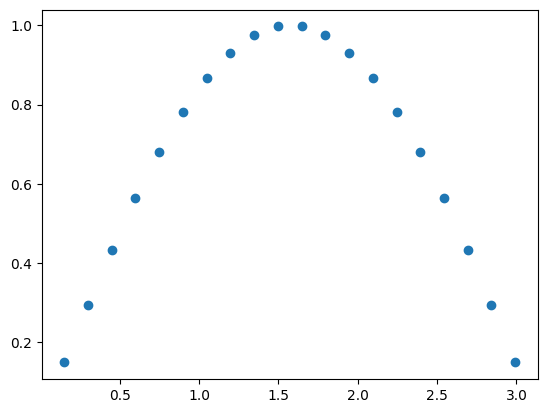

In [2]:
import matplotlib.pyplot as plt
plt.plot(points[:, 0], points[:, 1], 'o')

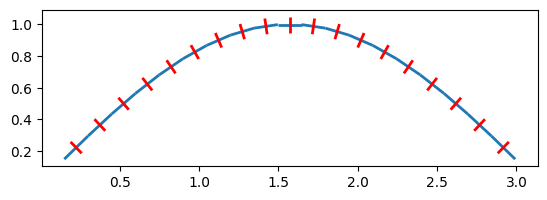

In [16]:
from matplotlib import collections  as mc
import numpy as np

def perpendicular_segment(segment, eps=0.05):
    # Calculate midpoint of the segment
    start, end = segment
    midpoint = (start + end) / 2
    d = end - start
    perp = np.array([d[1], -d[0]])
    perp /= np.linalg.norm(perp)
    perp *= eps
    perp_segment = (midpoint - perp, midpoint + perp)
    return perp_segment

sine_segments = [(points[i], points[i+1]) for i in range(n_points-1)]
lc = mc.LineCollection(sine_segments, linewidths=2)

perpendicular_segments = [perpendicular_segment(segment) for segment in sine_segments]
perpendicular_lc = mc.LineCollection(perpendicular_segments, linewidths=2, color='r')

fig, ax = plt.subplots()
ax.add_collection(lc)
ax.add_collection(perpendicular_lc)
ax.autoscale()
ax.axes.set_aspect('equal')